<a href="https://colab.research.google.com/github/kylelee417/Data-Science_Portfolio/blob/master/VAE_final%20v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#source:https://darektidwell.com/using-selenium-with-google-colaboratory/
# Install cromium, its driver, and selenium
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

# Set options to be headless
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.webite-url.com")

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromiu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install google_images_download

  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=22df3da73d02c797b6666ccd96e7be2c36d71d281225d22ff0e1dbca276a9811
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download
import os

In [0]:
data_path = '/content/drive/My Drive/downloads'
data_path
os.chdir(data_path)

In [0]:
#creating object
response = google_images_download.googleimagesdownload()

search_queries = ['japanese men hair front']

In [0]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    size = 'medium',
                    chromedriver= '/usr/lib/chromium-browser/chromedriver',
                    aspect_ratio='square',
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    size = 'medium',     
                    aspect_ratio='square',
                    print_urls=False)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [0]:
# Driver Code 

download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 769 is all we got for this search filter!


FileNotFoundError: ignored

In [0]:
men_hair = "/content/drive/My Drive/downloads/"

img_all_train = glob(men_hair+"/man hairstyle top view/train/*.jpg")

img_all_test = glob(men_hair+"/man hairstyle top view/test/*.jpg")



In [150]:
#source:https://www.kaggle.com/aakashnain/beating-everything-with-depthwise-convolution
# Preparing train, test data


train_data = []
test_data = []


#Train
for img in img_all_train:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))
   
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    train_data.append(img)
    
#Test                      
for img in img_all_test:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))
    
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    test_data.append(img)
   
    

train_data = np.array(train_data)
test_data = np.array(test_data)

print("Total number of train examples: ", train_data.shape)
print("Total number of test examples:", test_data.shape)

Total number of train examples:  (455, 96, 96, 1)
Total number of test examples: (86, 96, 96, 1)


In [0]:
#dependencies (numpy, matplotlib, and keras)
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob #retriving an array of files in directories
from scipy.stats import norm
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Flatten, Lambda, Reshape, Dropout
from keras.models import Model
from keras import backend as K





In [173]:



original_dim = 9216
latent_dim = 2



input_img = Input(shape=(96,96,1))  # adapt this if using `channels_first` image data format


x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

shape_before_flattening = K.int_shape(encoded)

x = Flatten()(encoded)
encoded_to_z = Dense(32, activation='relu')(x)


#Tow outputs, latent mean and (log) variance
z_mean = Dense(latent_dim)(encoded_to_z)
z_log_var = Dense(latent_dim)(encoded_to_z)

print(z_mean)
print(z_log_var)


Tensor("dense_53/BiasAdd:0", shape=(?, 2), dtype=float32)
Tensor("dense_54/BiasAdd:0", shape=(?, 2), dtype=float32)


In [174]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(1,2), mean=0., stddev = 1.)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling)([z_mean, z_log_var])

print(z)
print(shape_before_flattening[1:])

Tensor("lambda_13/add:0", shape=(?, 2), dtype=float32)
(6, 6, 32)


In [0]:
x = Dense(32, activation='relu')(z)

#Expand to 1152 total pixels
x = Dense(1152, activation='relu')(x)

#Reshape
x = Reshape(shape_before_flattening[1:])(x)


#Decoder
x = Conv2DTranspose(32, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(64, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(64, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(128, (2,2),padding='same', activation='relu',strides=(2, 2))(x)

z_decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)



In [0]:
def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(z_log_var) + K.square(z_mean) - 1. - z_log_var, axis=1)
    
    return recon + kl


In [177]:
vae = Model(input_img, z_decoded)
vae.compile(optimizer='rmsprop', loss=vae_loss)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 96, 96, 1)    0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 96, 96, 128)  1280        input_12[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_35 (MaxPooling2D) (None, 48, 48, 128)  0           conv2d_44[0][0]                  
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 48, 48, 64)   73792       max_pooling2d_35[0][0]           
__________________________________________________________________________________________________
max_poolin

In [178]:
vae.fit(train_data, train_data,
        shuffle=True,
        epochs=65,
        steps_per_epoch= int(len(train_data)/32),
        validation_steps= int(len(test_data)/32),
        validation_data=(test_data,test_data),verbose=1)

Train on 455 samples, validate on 86 samples
Epoch 1/65
14/14 [==============================] - 25s 2s/step - loss: 100.8261 - val_loss: 89.9355
Epoch 2/65
14/14 [==============================] - 20s 1s/step - loss: 92.4225 - val_loss: 89.5035
Epoch 3/65
14/14 [==============================] - 20s 1s/step - loss: 90.5238 - val_loss: 86.6600
Epoch 4/65
14/14 [==============================] - 20s 1s/step - loss: 87.1057 - val_loss: 84.9404
Epoch 5/65
14/14 [==============================] - 20s 1s/step - loss: 86.3685 - val_loss: 86.2814
Epoch 6/65
14/14 [==============================] - 20s 1s/step - loss: 86.7139 - val_loss: 84.9916
Epoch 7/65
14/14 [==============================] - 20s 1s/step - loss: 85.9532 - val_loss: 85.2414
Epoch 8/65
14/14 [==============================] - 20s 1s/step - loss: 85.2072 - val_loss: 84.5888
Epoch 9/65
14/14 [==============================] - 20s 1s/step - loss: 84.2130 - val_loss: 80.9215
Epoch 10/65
14/14 [==============================] - 2

In [194]:
result_imgs1 = vae.predict(test_data, batch_size = int(len(test_data)/32), verbose=1)


86/86 [==============================] - 0s 3ms/step


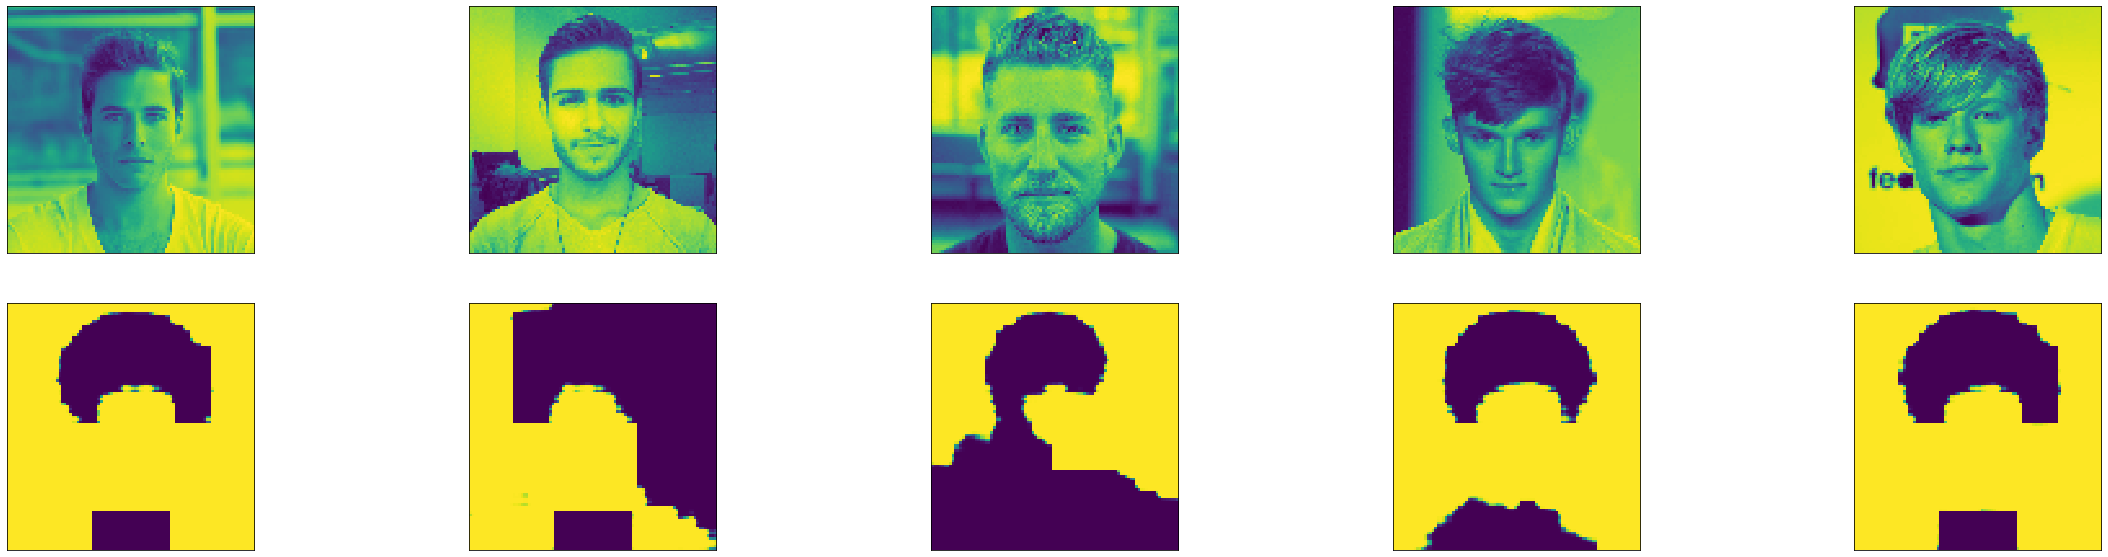

In [195]:
import matplotlib.pyplot as plt

n = 5# how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result_imgs1[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()